In [5]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [6]:
combine = pd.read_csv('Draft_Combine.csv')

In [7]:
combine.tail(10)

,PLAYER,YEAR,POS,HEIGHT,WEIGHT,BMI,BODY FAT,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,SHUTTLE RUN,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
1469,"Santangelo, Matt",2000,PG,72.00,177.0,24.00,NaN,94.0,75.00,NaN,NaN,33.5,43.0,10.66,NaN,3.06,12.0,1.042,NaN,127.5,137.0
1470,"Scales, Alex",2000,PG/SG,74.25,184.5,23.53,NaN,97.5,81.00,NaN,NaN,38.5,42.5,10.98,NaN,3.21,10.0,1.091,NaN,136.0,140.0
1471,"Shabazz, Karim",2000,C,83.50,224.0,22.59,NaN,111.5,87.00,NaN,NaN,24.5,28.0,12.72,NaN,3.36,2.0,1.042,NaN,136.0,139.5
1472,"Sheppard, Nick",2000,PF/C,81.50,273.0,28.89,NaN,107.5,83.00,NaN,NaN,23.5,25.5,12.14,NaN,3.52,18.0,1.018,NaN,131.0,133.0
1473,"Smith, Jabari",2000,PF/C,81.75,240.5,25.30,NaN,109.5,86.50,NaN,NaN,24.5,30.0,12.45,NaN,3.43,15.0,1.058,NaN,134.0,139.5
1474,"Smith, Mike",2000,SF,78.50,198.0,22.59,NaN,103.0,80.50,NaN,NaN,33.0,21.0,11.32,NaN,3.22,12.0,1.025,NaN,136.0,124.0
1475,"Stephens, Jarrett",2000,PF,77.25,258.0,30.39,NaN,103.0,81.25,NaN,NaN,27.0,29.0,11.98,NaN,3.46,13.0,1.052,NaN,130.0,132.0
1476,"Thornton, Bootsy",2000,SG,75.50,194.5,23.99,NaN,101.5,78.50,NaN,NaN,26.5,31.0,12.08,NaN,3.33,7.0,1.040,NaN,128.0,132.5
1477,"Walls, Jaquay",2000,PG,73.25,165.5,21.68,NaN,96.5,74.50,NaN,NaN,28.5,35.5,10.75,NaN,3.23,0.0,1.017,NaN,125.0,132.0
1478,"Watkins, Jameel",2000,PF/C,81.50,244.5,25.88,NaN,110.0,90.00,NaN,NaN,28.0,30.5,12.38,NaN,3.45,11.0,1.104,NaN,138.0,140.5


In [8]:
combine.shape

(1479, 21)

In [9]:
combine.isna().sum()

PLAYER                     0
YEAR                       0
POS                        0
HEIGHT                     4
WEIGHT                     6
BMI                        6
BODY FAT                 234
STANDING REACH             5
WINGSPAN                   3
HAND LENGTH              735
HAND WIDTH               735
STANDING VERTICAL        171
VERTICAL LEAP            171
LANE AGILITY             180
SHUTTLE RUN             1014
THREE QUARTER SPRINT     179
BENCH PRESS              404
BAR                        4
PAN                      735
PBH                      172
PDT                      172
dtype: int64

# dropped shuttle run (1014 missing values)

In [10]:
combine = combine.drop(['SHUTTLE RUN'], axis=1)

# drop body fat (we will use bmi which has no missing values)

In [11]:
combine = combine.drop(['BODY FAT'], axis=1)

# dropped rows with missing height and weight values (only 6)

In [12]:
combine = combine[combine['HEIGHT'].notna()]
combine = combine[combine['WEIGHT'].notna()]
combine.shape

(1473, 19)

# Used linear regression with height as the predictor to predict hand length and width

<AxesSubplot:xlabel='HEIGHT', ylabel='HAND LENGTH'>

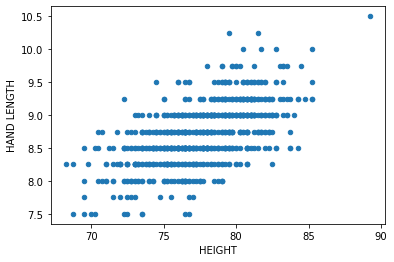

In [13]:
combine.plot.scatter(x='HEIGHT', y='HAND LENGTH')

<AxesSubplot:xlabel='HEIGHT', ylabel='HAND WIDTH'>

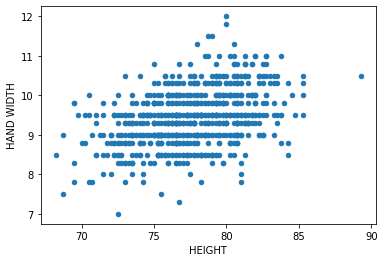

In [14]:
combine.plot.scatter(x='HEIGHT', y='HAND WIDTH')

In [15]:
test1 = combine[combine['HAND LENGTH'].isnull()]

In [16]:
train1 = combine[combine['HAND LENGTH'].notna()]

In [17]:
x_train1 = train1['HEIGHT'].values.reshape(-1, 1)


In [18]:
y_train1 = train1['HAND LENGTH']

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [20]:
reg.fit(x_train1, y_train1)

LinearRegression()

In [21]:
x_test1 = test1['HEIGHT'].values.reshape(-1,1)

In [22]:
y_pred1 = reg.predict(x_test1)

In [23]:
test1['HAND LENGTH'] = y_pred1

/var/folders/ky/t3qz7fy91yx5vrk7bkh4xyr00000gn/T/ipykernel_1801/591794881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['HAND LENGTH'] = y_pred1


In [24]:
y_train2 = train1['HAND WIDTH']

In [25]:
reg2 = LinearRegression()

In [26]:
reg2.fit(x_train1, y_train2)

LinearRegression()

In [27]:
y_pred2 = reg2.predict(x_test1)

In [28]:
test1['HAND WIDTH'] = y_pred2

/var/folders/ky/t3qz7fy91yx5vrk7bkh4xyr00000gn/T/ipykernel_1801/256308744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['HAND WIDTH'] = y_pred2


In [29]:
combine2 = pd.concat([train1, test1])

In [30]:
combine2

,PLAYER,YEAR,POS,HEIGHT,WEIGHT,BMI,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
0,"Agbaji, Ochai",2022,SG,76.50,216.8,26.04,104.0,82.25,8.750000,9.500000,32.0,39.0,10.77,3.13,NaN,1.075,83.1,136.0,143.0
1,"Baldwin Jr., Patrick",2022,SF,81.25,230.8,24.58,110.5,85.75,8.750000,9.500000,23.5,26.5,12.25,3.45,NaN,1.055,83.1,134.0,137.0
2,"Barlow, Dominick",2022,PF,80.75,221.0,23.83,108.5,87.00,9.000000,10.500000,28.5,34.0,11.29,3.33,NaN,1.077,94.5,137.0,142.5
3,"Beauchamp, MarJon",2022,SG,77.25,196.6,23.16,106.0,84.75,9.000000,9.000000,NaN,NaN,NaN,NaN,NaN,1.097,81.0,NaN,NaN
4,"Besson, Hugo",2022,SG,76.50,180.4,21.67,102.0,77.50,7.500000,8.500000,24.5,31.5,11.36,3.40,NaN,1.013,63.8,126.5,133.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,"Smith, Mike",2000,SF,78.50,198.0,22.59,103.0,80.50,8.807104,9.517017,33.0,21.0,11.32,3.22,12.0,1.025,NaN,136.0,124.0
1475,"Stephens, Jarrett",2000,PF,77.25,258.0,30.39,103.0,81.25,8.696462,9.406991,27.0,29.0,11.98,3.46,13.0,1.052,NaN,130.0,132.0
1476,"Thornton, Bootsy",2000,SG,75.50,194.5,23.99,101.5,78.50,8.541564,9.252955,26.5,31.0,12.08,3.33,7.0,1.040,NaN,128.0,132.5
1477,"Walls, Jaquay",2000,PG,73.25,165.5,21.68,96.5,74.50,8.342409,9.054908,28.5,35.5,10.75,3.23,0.0,1.017,NaN,125.0,132.0


# used new hand width and lengths values to find PAN values (hand length times hand width)

In [31]:
combine2['PAN'] = combine2['HAND LENGTH'] * combine2['HAND WIDTH']

In [32]:
combine2

,PLAYER,YEAR,POS,HEIGHT,WEIGHT,BMI,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
0,"Agbaji, Ochai",2022,SG,76.50,216.8,26.04,104.0,82.25,8.750000,9.500000,32.0,39.0,10.77,3.13,NaN,1.075,83.125000,136.0,143.0
1,"Baldwin Jr., Patrick",2022,SF,81.25,230.8,24.58,110.5,85.75,8.750000,9.500000,23.5,26.5,12.25,3.45,NaN,1.055,83.125000,134.0,137.0
2,"Barlow, Dominick",2022,PF,80.75,221.0,23.83,108.5,87.00,9.000000,10.500000,28.5,34.0,11.29,3.33,NaN,1.077,94.500000,137.0,142.5
3,"Beauchamp, MarJon",2022,SG,77.25,196.6,23.16,106.0,84.75,9.000000,9.000000,NaN,NaN,NaN,NaN,NaN,1.097,81.000000,NaN,NaN
4,"Besson, Hugo",2022,SG,76.50,180.4,21.67,102.0,77.50,7.500000,8.500000,24.5,31.5,11.36,3.40,NaN,1.013,63.750000,126.5,133.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,"Smith, Mike",2000,SF,78.50,198.0,22.59,103.0,80.50,8.807104,9.517017,33.0,21.0,11.32,3.22,12.0,1.025,83.817353,136.0,124.0
1475,"Stephens, Jarrett",2000,PF,77.25,258.0,30.39,103.0,81.25,8.696462,9.406991,27.0,29.0,11.98,3.46,13.0,1.052,81.807538,130.0,132.0
1476,"Thornton, Bootsy",2000,SG,75.50,194.5,23.99,101.5,78.50,8.541564,9.252955,26.5,31.0,12.08,3.33,7.0,1.040,79.034699,128.0,132.5
1477,"Walls, Jaquay",2000,PG,73.25,165.5,21.68,96.5,74.50,8.342409,9.054908,28.5,35.5,10.75,3.23,0.0,1.017,75.539741,125.0,132.0


In [33]:
combine2.isna().sum()

PLAYER                    0
YEAR                      0
POS                       0
HEIGHT                    0
WEIGHT                    0
BMI                       0
STANDING REACH            1
WINGSPAN                  0
HAND LENGTH               0
HAND WIDTH                0
STANDING VERTICAL       166
VERTICAL LEAP           166
LANE AGILITY            175
THREE QUARTER SPRINT    174
BENCH PRESS             398
BAR                       0
PAN                       0
PBH                     166
PDT                     166
dtype: int64

In [34]:
combine2 = combine2[combine2['STANDING REACH'].notna()]

In [35]:
combine2.shape

(1472, 19)

In [36]:
combine3 = combine2[combine2['STANDING VERTICAL'].notna()]

In [37]:
combine3 = combine3[combine3['LANE AGILITY'].notna()]

In [38]:
combine3 = combine3[combine3['THREE QUARTER SPRINT'].notna()]

In [39]:
combine3.isna().sum()
combine3.shape

(1289, 19)

# use linear regression based on weight to determine bench press

In [40]:
test2 = combine3[combine3['BENCH PRESS'].isnull()]

In [41]:
train2 = combine3[combine3['BENCH PRESS'].notna()]

In [42]:
x_train2 = train2['WEIGHT'].values.reshape(-1, 1)

In [43]:
y_train2 = train2['BENCH PRESS']

In [44]:
reg3 = LinearRegression()
reg3.fit(x_train2, y_train2)

LinearRegression()

In [45]:
x_test2 = test2['WEIGHT'].values.reshape(-1,1)
y_pred2 = reg3.predict(x_test2)

In [46]:
test2['BENCH PRESS'] = np.round(y_pred2)

/var/folders/ky/t3qz7fy91yx5vrk7bkh4xyr00000gn/T/ipykernel_1801/3067148241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['BENCH PRESS'] = np.round(y_pred2)


In [47]:
test2

,PLAYER,YEAR,POS,HEIGHT,WEIGHT,BMI,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
0,"Agbaji, Ochai",2022,SG,76.50,216.8,26.04,104.0,82.25,8.750000,9.500000,32.0,39.0,10.77,3.13,10.0,1.075,83.125000,136.0,143.0
1,"Baldwin Jr., Patrick",2022,SF,81.25,230.8,24.58,110.5,85.75,8.750000,9.500000,23.5,26.5,12.25,3.45,12.0,1.055,83.125000,134.0,137.0
2,"Barlow, Dominick",2022,PF,80.75,221.0,23.83,108.5,87.00,9.000000,10.500000,28.5,34.0,11.29,3.33,11.0,1.077,94.500000,137.0,142.5
4,"Besson, Hugo",2022,SG,76.50,180.4,21.67,102.0,77.50,7.500000,8.500000,24.5,31.5,11.36,3.40,8.0,1.013,63.750000,126.5,133.5
5,"Branham, Malaki",2022,SG,76.00,194.8,23.71,102.5,82.00,8.500000,9.800000,29.0,35.0,11.38,3.17,9.0,1.079,83.300000,131.5,137.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,"Jones, Dahntay",2003,SG/SF,76.75,214.0,25.54,102.5,81.00,8.652205,9.362981,30.0,39.5,10.91,3.11,10.0,1.055,81.010429,132.5,142.0
1295,"Jones, Fred",2002,SG,74.25,218.0,27.80,100.0,84.00,8.430922,9.142929,33.5,37.5,11.12,3.13,11.0,1.131,77.083317,133.5,137.5
1332,"Williams, Frank",2002,PG,73.50,212.0,27.59,100.5,80.00,8.364537,9.076913,26.0,31.0,11.73,3.29,10.0,1.088,75.924174,126.5,131.5
1418,"Brezec, Primoz",2000,C,84.75,243.0,23.78,110.0,86.00,9.360312,10.067147,26.0,29.5,11.53,3.55,13.0,1.015,94.231632,136.0,139.5


In [48]:
train2

,PLAYER,YEAR,POS,HEIGHT,WEIGHT,BMI,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
169,"Bazley, Darius",2019,PF,79.75,208.4,23.04,107.0,84.00,9.000000,9.800000,30.5,37.0,11.09,3.27,4.0,1.053,88.200000,137.5,144.0
171,"Bone, Jordan",2019,SG,73.50,179.0,23.29,95.0,75.25,7.500000,9.300000,36.0,42.5,9.97,3.08,7.0,1.024,69.750000,131.0,137.5
172,"Bowen II, Brian",2019,SF,78.25,200.0,22.96,103.0,82.00,8.500000,9.800000,32.0,35.5,10.98,3.26,1.0,1.048,83.300000,135.0,138.5
173,"Bowman, Ky",2019,PG,73.00,181.2,23.90,98.0,79.00,8.250000,9.000000,27.5,33.0,11.11,3.26,4.0,1.082,74.250000,125.5,131.0
174,"Brazdeikis, Ignas",2019,SF,77.75,220.8,25.68,102.0,81.25,8.750000,9.500000,31.0,36.5,11.06,3.36,13.0,1.045,83.125000,133.0,138.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,"Smith, Mike",2000,SF,78.50,198.0,22.59,103.0,80.50,8.807104,9.517017,33.0,21.0,11.32,3.22,12.0,1.025,83.817353,136.0,124.0
1475,"Stephens, Jarrett",2000,PF,77.25,258.0,30.39,103.0,81.25,8.696462,9.406991,27.0,29.0,11.98,3.46,13.0,1.052,81.807538,130.0,132.0
1476,"Thornton, Bootsy",2000,SG,75.50,194.5,23.99,101.5,78.50,8.541564,9.252955,26.5,31.0,12.08,3.33,7.0,1.040,79.034699,128.0,132.5
1477,"Walls, Jaquay",2000,PG,73.25,165.5,21.68,96.5,74.50,8.342409,9.054908,28.5,35.5,10.75,3.23,0.0,1.017,75.539741,125.0,132.0


In [49]:
combine4 = pd.concat([train2, test2])

In [50]:
combine4.isna().sum()

PLAYER                  0
YEAR                    0
POS                     0
HEIGHT                  0
WEIGHT                  0
BMI                     0
STANDING REACH          0
WINGSPAN                0
HAND LENGTH             0
HAND WIDTH              0
STANDING VERTICAL       0
VERTICAL LEAP           0
LANE AGILITY            0
THREE QUARTER SPRINT    0
BENCH PRESS             0
BAR                     0
PAN                     0
PBH                     0
PDT                     0
dtype: int64

In [51]:
combine4 = combine4.reset_index(drop=True)

In [52]:
position = combine4['POS'].tolist()

In [53]:
primary = []
for pos in position:
    primary.append(pos.split("/")[0])

In [54]:
d = {'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5}
primary_num = [d[k] for k in primary]

In [55]:
combine4['POS'] = primary_num
combine4

,PLAYER,YEAR,POS,HEIGHT,WEIGHT,BMI,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
0,"Bazley, Darius",2019,4,79.75,208.4,23.04,107.0,84.00,9.000000,9.800000,30.5,37.0,11.09,3.27,4.0,1.053,88.200000,137.5,144.0
1,"Bone, Jordan",2019,2,73.50,179.0,23.29,95.0,75.25,7.500000,9.300000,36.0,42.5,9.97,3.08,7.0,1.024,69.750000,131.0,137.5
2,"Bowen II, Brian",2019,3,78.25,200.0,22.96,103.0,82.00,8.500000,9.800000,32.0,35.5,10.98,3.26,1.0,1.048,83.300000,135.0,138.5
3,"Bowman, Ky",2019,1,73.00,181.2,23.90,98.0,79.00,8.250000,9.000000,27.5,33.0,11.11,3.26,4.0,1.082,74.250000,125.5,131.0
4,"Brazdeikis, Ignas",2019,3,77.75,220.8,25.68,102.0,81.25,8.750000,9.500000,31.0,36.5,11.06,3.36,13.0,1.045,83.125000,133.0,138.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,"Jones, Dahntay",2003,2,76.75,214.0,25.54,102.5,81.00,8.652205,9.362981,30.0,39.5,10.91,3.11,10.0,1.055,81.010429,132.5,142.0
1285,"Jones, Fred",2002,2,74.25,218.0,27.80,100.0,84.00,8.430922,9.142929,33.5,37.5,11.12,3.13,11.0,1.131,77.083317,133.5,137.5
1286,"Williams, Frank",2002,1,73.50,212.0,27.59,100.5,80.00,8.364537,9.076913,26.0,31.0,11.73,3.29,10.0,1.088,75.924174,126.5,131.5
1287,"Brezec, Primoz",2000,5,84.75,243.0,23.78,110.0,86.00,9.360312,10.067147,26.0,29.5,11.53,3.55,13.0,1.015,94.231632,136.0,139.5


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
pos = combine4['POS']
measures = combine4.drop(['PLAYER', 'YEAR', 'POS'], axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(measures, pos, test_size=0.25, random_state=42)

In [59]:
y_train

1217    4
526     2
807     3
755     3
1105    1
       ..
1044    4
1095    2
1130    3
860     4
1126    4
Name: POS, Length: 966, dtype: int64

# Trained and tested initial model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf=RandomForestClassifier(n_estimators=100)

In [62]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
preds = clf.predict(X_test)

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.7461300309597523


In [65]:
preds

array([1, 2, 4, 2, 2, 1, 2, 2, 4, 1, 2, 4, 4, 2, 1, 5, 3, 2, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 4, 4, 3, 4, 3, 5, 4, 2, 2, 5, 4, 2, 2, 1, 4, 1, 1,
       1, 2, 4, 3, 1, 4, 4, 3, 1, 4, 1, 4, 3, 3, 4, 3, 3, 4, 1, 2, 4, 3,
       4, 2, 4, 4, 5, 4, 4, 4, 2, 1, 3, 2, 1, 4, 4, 3, 3, 4, 3, 4, 1, 1,
       4, 1, 3, 2, 1, 4, 3, 2, 3, 3, 4, 3, 2, 4, 1, 2, 3, 1, 2, 4, 2, 4,
       3, 4, 1, 2, 4, 2, 1, 3, 4, 3, 1, 4, 3, 1, 4, 3, 3, 4, 2, 4, 4, 1,
       2, 3, 2, 4, 4, 2, 2, 4, 3, 1, 4, 1, 1, 4, 3, 2, 5, 1, 4, 1, 2, 3,
       3, 2, 4, 3, 2, 3, 4, 5, 4, 3, 4, 2, 4, 1, 1, 1, 3, 4, 4, 1, 2, 4,
       4, 1, 4, 1, 3, 2, 3, 4, 4, 3, 4, 1, 2, 4, 2, 2, 2, 4, 3, 1, 1, 1,
       2, 1, 4, 4, 4, 3, 4, 3, 2, 1, 3, 1, 4, 4, 2, 1, 3, 3, 1, 2, 4, 5,
       4, 1, 1, 4, 1, 1, 3, 1, 4, 4, 2, 5, 3, 2, 4, 4, 4, 2, 2, 3, 4, 4,
       2, 2, 1, 1, 2, 2, 2, 3, 2, 1, 1, 1, 1, 1, 4, 2, 1, 2, 1, 2, 1, 4,
       2, 3, 4, 1, 4, 4, 2, 1, 2, 1, 4, 4, 1, 1, 4, 2, 5, 2, 1, 4, 4, 4,
       2, 2, 1, 1, 4, 1, 3, 2, 1, 1, 4, 3, 5, 1, 1,

In [70]:
combine5 = combine4.drop(['PLAYER', 'YEAR'], axis=1)

,POS,HEIGHT,WEIGHT,BMI,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
0,4,79.75,208.4,23.04,107.0,84.00,9.000000,9.800000,30.5,37.0,11.09,3.27,4.0,1.053,88.200000,137.5,144.0
1,2,73.50,179.0,23.29,95.0,75.25,7.500000,9.300000,36.0,42.5,9.97,3.08,7.0,1.024,69.750000,131.0,137.5
2,3,78.25,200.0,22.96,103.0,82.00,8.500000,9.800000,32.0,35.5,10.98,3.26,1.0,1.048,83.300000,135.0,138.5
3,1,73.00,181.2,23.90,98.0,79.00,8.250000,9.000000,27.5,33.0,11.11,3.26,4.0,1.082,74.250000,125.5,131.0
4,3,77.75,220.8,25.68,102.0,81.25,8.750000,9.500000,31.0,36.5,11.06,3.36,13.0,1.045,83.125000,133.0,138.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,2,76.75,214.0,25.54,102.5,81.00,8.652205,9.362981,30.0,39.5,10.91,3.11,10.0,1.055,81.010429,132.5,142.0
1285,2,74.25,218.0,27.80,100.0,84.00,8.430922,9.142929,33.5,37.5,11.12,3.13,11.0,1.131,77.083317,133.5,137.5
1286,1,73.50,212.0,27.59,100.5,80.00,8.364537,9.076913,26.0,31.0,11.73,3.29,10.0,1.088,75.924174,126.5,131.5
1287,5,84.75,243.0,23.78,110.0,86.00,9.360312,10.067147,26.0,29.5,11.53,3.55,13.0,1.015,94.231632,136.0,139.5


# xgboost

In [73]:
X_combine = combine5.iloc[:, 1:]
X_combine

,HEIGHT,WEIGHT,BMI,STANDING REACH,WINGSPAN,HAND LENGTH,HAND WIDTH,STANDING VERTICAL,VERTICAL LEAP,LANE AGILITY,THREE QUARTER SPRINT,BENCH PRESS,BAR,PAN,PBH,PDT
0,79.75,208.4,23.04,107.0,84.00,9.000000,9.800000,30.5,37.0,11.09,3.27,4.0,1.053,88.200000,137.5,144.0
1,73.50,179.0,23.29,95.0,75.25,7.500000,9.300000,36.0,42.5,9.97,3.08,7.0,1.024,69.750000,131.0,137.5
2,78.25,200.0,22.96,103.0,82.00,8.500000,9.800000,32.0,35.5,10.98,3.26,1.0,1.048,83.300000,135.0,138.5
3,73.00,181.2,23.90,98.0,79.00,8.250000,9.000000,27.5,33.0,11.11,3.26,4.0,1.082,74.250000,125.5,131.0
4,77.75,220.8,25.68,102.0,81.25,8.750000,9.500000,31.0,36.5,11.06,3.36,13.0,1.045,83.125000,133.0,138.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,76.75,214.0,25.54,102.5,81.00,8.652205,9.362981,30.0,39.5,10.91,3.11,10.0,1.055,81.010429,132.5,142.0
1285,74.25,218.0,27.80,100.0,84.00,8.430922,9.142929,33.5,37.5,11.12,3.13,11.0,1.131,77.083317,133.5,137.5
1286,73.50,212.0,27.59,100.5,80.00,8.364537,9.076913,26.0,31.0,11.73,3.29,10.0,1.088,75.924174,126.5,131.5
1287,84.75,243.0,23.78,110.0,86.00,9.360312,10.067147,26.0,29.5,11.53,3.55,13.0,1.015,94.231632,136.0,139.5


In [108]:
y_combine = combine5.iloc[:,0]
y_combine = le.fit_transform(y_combine)
y_combine

array([3, 1, 2, ..., 0, 4, 1])

In [109]:
combine_dmatrix = xgb.DMatrix(data=X_combine,label=y_combine)

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [111]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [112]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [113]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.21%


# xgboost with cross validation

In [114]:
from xgboost import cv

In [131]:
params = {"objective":"multi:softprob",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
params['num_class'] = 5

In [133]:
xgb_cv = cv(dtrain=combine_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [134]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.851484,0.008901,0.804765,0.020098
1,0.902127,0.007717,0.863760,0.018081
2,0.920866,0.004807,0.879497,0.013367
3,0.927324,0.004487,0.886092,0.011611
4,0.931895,0.003952,0.892522,0.007435
5,0.936213,0.004300,0.900090,0.006044
6,0.937415,0.003815,0.902573,0.006325
7,0.939699,0.003788,0.904332,0.004785
8,0.941019,0.003295,0.906666,0.004037
9,0.941524,0.003176,0.905957,0.003991
